In [32]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.test.utils import get_tmpfile
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
ramen_df = pd.read_csv('../input/ramen-ratings/ramen-ratings.csv')
print(ramen_df.shape)
ramen_df.head()

(2580, 7)


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


## The ID is review

In [3]:
print(ramen_df['Review #'].nunique())

2580


In [4]:
ramen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


### let's see what is top 10 means

In [5]:

ramen_df[ramen_df['Top Ten'].isnull() == False]['Top Ten'].unique()

array(['2016 #10', '2016 #1', '2016 #8', '2016 #5', '2016 #9', '2016 #7',
       '2015 #10', '2015 #7', '2015 #4', '2015 #9', '2015 #6', '2015 #1',
       '2013 #10', '2015 #8', '2014 #7', '2014 #4', '2014 #9', '2014 #10',
       '2014 #8', '2014 #5', '2014 #6', '2014 #1', '2013 #1', '2013 #2',
       '2013 #4', '\n', '2013 #9', '2013 #3', '2012 #10', '2012 #7',
       '2012 #5', '2012 #3', '2012 #6', '2012 #9', '2012 #1', '2012 #2',
       '2013 #6', '2012 #4'], dtype=object)

> Top ten is given for top 10 ramens ranked over a year in years 2013-2016 (4 years * 10 =40 number of non-null values -1 because of that /n record)

> let's see if the review numbe is associated with the years

In [6]:
ramen_df[ramen_df['Top Ten'].isnull() == False][['Review #','Top Ten']].sort_values(by='Review #')

,Review #,Top Ten
2567,13,2012 #4
2549,31,2013 #6
2535,45,\n
2533,47,2012 #2
2475,105,2012 #1
2295,285,2012 #9
2248,332,\n
2189,391,2012 #6
2188,392,2012 #3
2146,434,2012 #5


### The reiew number looks to be associated with time 

In [7]:
ramen_df['Top Ten'].fillna('not ranked',inplace=True)
ramen_df.loc[ramen_df["Top Ten"] =="\n",'Top Ten'] = 'not ranked'


In [8]:
top_ramen = pd.DataFrame()
top_ramen = ramen_df[ramen_df["Top Ten"] != "not ranked"]
top_ramen['year'] = ramen_df[ramen_df["Top Ten"] != "not ranked"]["Top Ten"].str.extract(r'([0-9]+)')
top_ramen['rank'] = ramen_df[ramen_df["Top Ten"] != "not ranked"]["Top Ten"].str.extract(r'(#[0-9]+)').replace('#',' ',regex=True)
top_ramen.drop('Top Ten',inplace =True,axis=1)
top_ramen.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

,Review #,Brand,Variety,Style,Country,Stars,year,rank
616,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5,2016,10
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5,2016,1
655,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5,2016,8
673,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5,2016,5
752,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5,2016,9


### let's do some exploration

In [9]:
ramen_df['Stars'].unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 'Unrated', '1.5', '3.25', '2', '0', '3',
       '0.5', '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3',
       '4.0', '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1',
       '0.9', '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8',
       '3.7', '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

In [10]:
ramen_df.dtypes

Review #     int64
Brand       object
Variety     object
Style       object
Country     object
Stars       object
Top Ten     object
dtype: object

In [11]:
row = ramen_df.query('Stars != "Unrated"')['Stars'].astype('float')

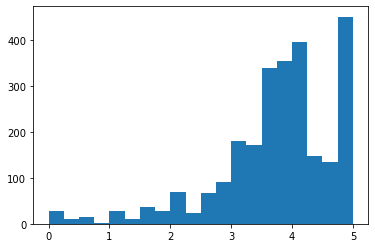

In [12]:
plt.hist(row,bins=20);

> left skewed as positive ratings like 5 (the higheest frequency) and 4 are more likely to be found.

In [13]:
ramen_df.query('Stars == "Unrated"').shape[0]

3

> just 3 records unrated we can git rid of them 

In [14]:
ramen_df.drop(ramen_df[ramen_df['Stars']=="Unrated"].index,inplace=True)
ramen_df['Stars'] = ramen_df['Stars'].astype('float')

In [15]:
category_cols = ['Brand','Variety','Style','Country']

for i,col in enumerate(category_cols):
    print(ramen_df[col].nunique())

355
2410
7
38


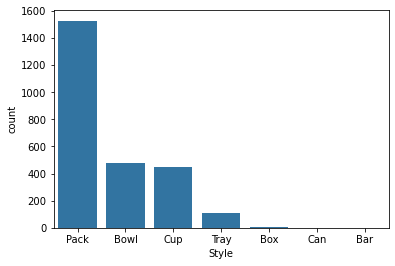

In [16]:
color = sns.color_palette()[0]
sns.countplot(data=ramen_df,x='Style',color=color,order = ramen_df['Style'].value_counts().index);

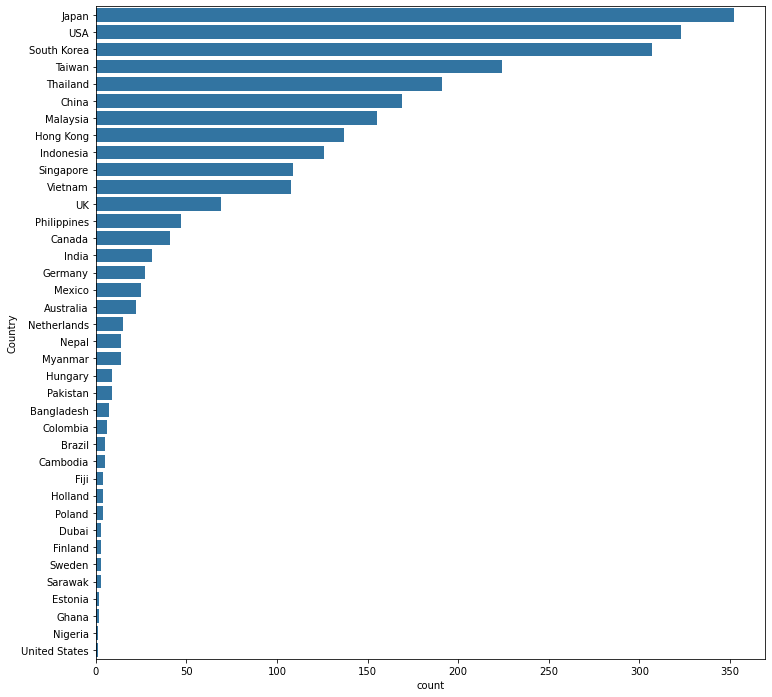

In [17]:
plt.figure(figsize=(12,12))
sns.countplot(data=ramen_df,y='Country',color=color,order = ramen_df['Country'].value_counts().index);


In [18]:
ramen_df['Brand'].value_counts()[ramen_df['Brand'].value_counts() >30]

Nissin           381
Nongshim          98
Maruchan          76
Mama              71
Paldo             66
Myojo             63
Indomie           53
Samyang Foods     51
Ottogi            45
Lucky Me!         34
Vina Acecook      34
Vifon             33
Name: Brand, dtype: int64

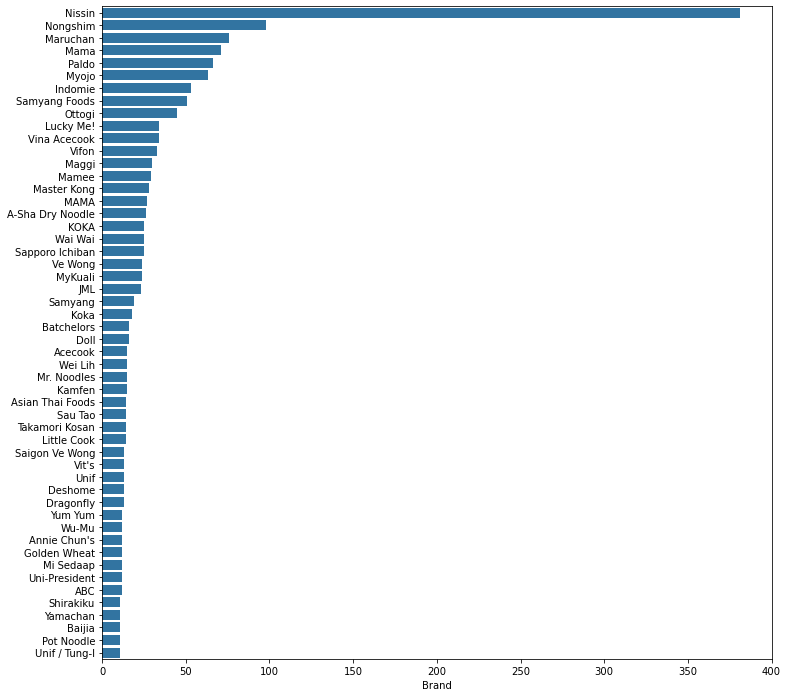

In [19]:
plt.figure(figsize=(12,12))
B_count = ramen_df['Brand'].value_counts()
B_count = B_count[B_count>10]
sns.barplot(x=B_count,y=B_count.index,color=color);


### let's see the relation between countries, Brand, style with rating

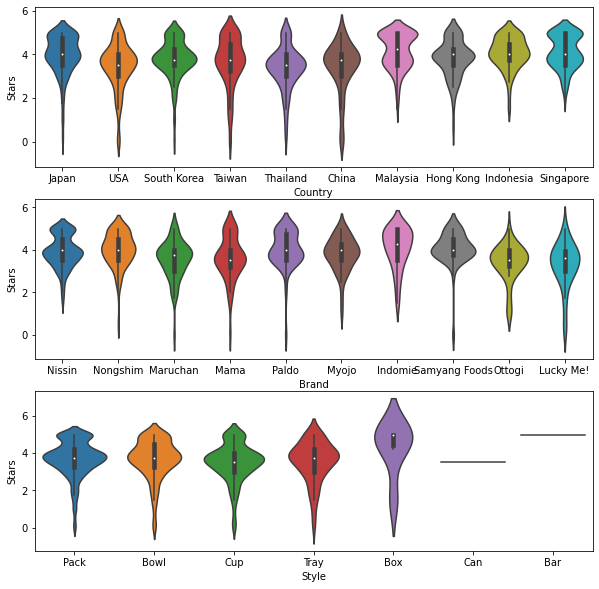

In [20]:
cols = ['Country', 'Brand', 'Style']
fig,axs = plt.subplots(3,1,figsize=(10,10))
for i,col in enumerate(cols):
    top = list(ramen_df[cols[i]].value_counts()[:10].index)
    
    df= ramen_df[ramen_df[col].isin(top)]
    sns.violinplot(data=df,x=cols[i],y='Stars',ax=axs[i],order=top);
    


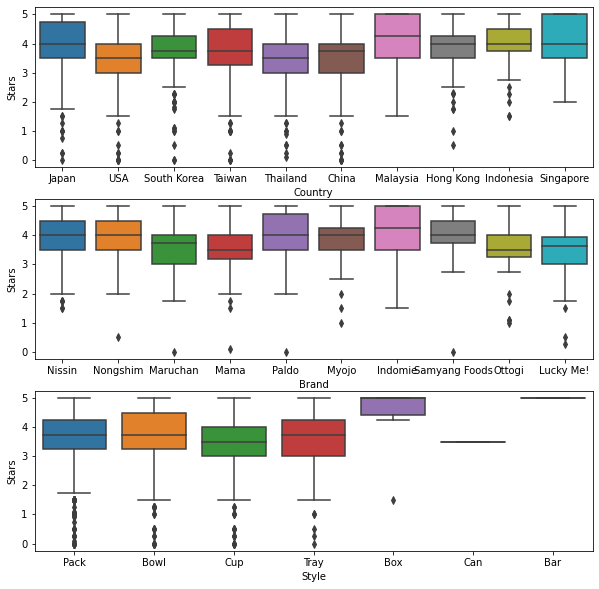

In [21]:
cols = ['Country', 'Brand', 'Style']
fig,axs = plt.subplots(3,1,figsize=(10,10))
for i,col in enumerate(cols):
    top = list(ramen_df[cols[i]].value_counts()[:10].index)
    
    df= ramen_df[ramen_df[col].isin(top)]
    sns.boxplot(data=df,x=cols[i],y='Stars',ax=axs[i],order=top);
    


> The ratings are high in general. For countries Japan, Malaysia, Indenosia and Singapore hs high peaks in 5 Stars rating. The Brands that has higher ratings are Nissin,Nongshim, Paldo and Indomies. 

>The style graph looks to not have effect on rating except for Box style which has high ratings (may be because the very low number of records). 

#### let's see the review number effect on the rating

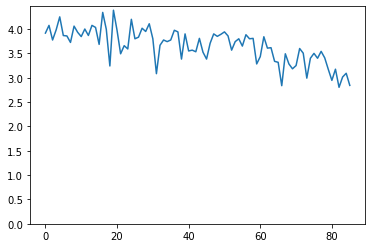

In [22]:
k = ramen_df.loc[:,'Stars'].groupby(np.arange(len(ramen_df))//30).mean()
plt.plot(k)
plt.ylim(0);

> The ratings are decreasing with time

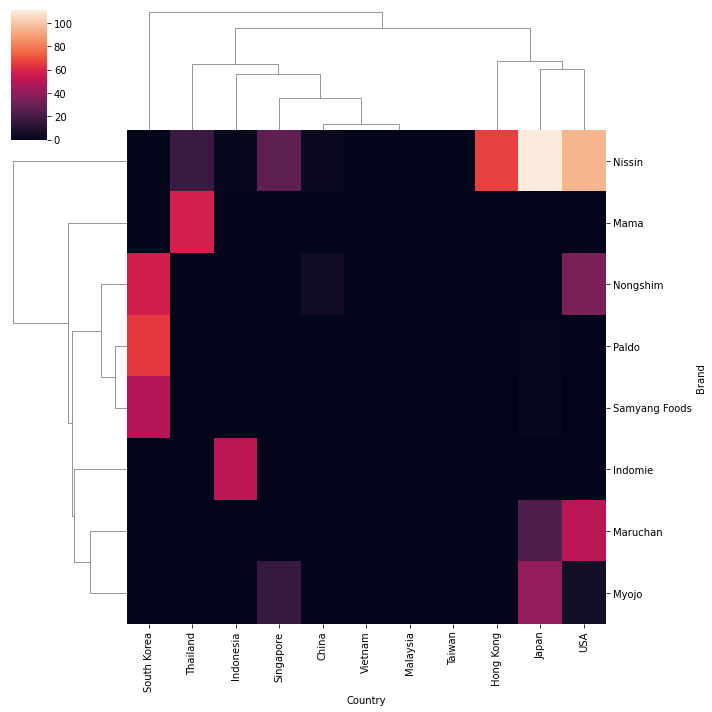

In [23]:
df = ramen_df
TopRamenCountris = ramen_df['Country'].value_counts()[:11]
df = ramen_df.query('Country in @TopRamenCountris.index')
df = df.groupby(['Country','Brand']).size().reset_index()
df = df.pivot('Brand','Country',0).fillna(0)
brands = df.sum(axis=1)[df.sum(axis=1)>50].index
sns.clustermap(df.loc[brands,:])

> Nissin is in Hong Kong, USA, Singapore  and mainly in Japan. The rest of the brands are in one or two places. USA, Japan and South Korea has more than 1 main Brand (3 main Brands).

>Indomie Brand is in indonisea mainly and indonisea has high ratings. From previous plots we see that Indomie has high ratings too.  

### Now let's take closer loak on Variety as the elements in it is nearly unique

In [24]:
variety_words =set()
for index,row in ramen_df.iterrows():
    #print(row)
    word_list = row['Variety'].split()
    variety_words.update(word_list)
len(variety_words)

1564

> There are 1564 unique word in the varieties 

### let's try to imped them and see if the rating is affected by it

In [25]:

text = ramen_df['Variety'].unique()
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(text)]
model = Doc2Vec(documents, vector_size=6, window=2, min_count=1, workers=4)
#Persist a model to disk:


fname = get_tmpfile("my_doc2vec_model")

model.save(fname)



In [26]:

fname = get_tmpfile("my_doc2vec_model")
model = Doc2Vec.load(fname)  # you can continue training with the loaded model!
#If you’re finished training a model (=no more updates, only querying, reduce memory usage), you can do:

model.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
#Infer vector for a new document:


In [27]:
for index,row in ramen_df.iterrows(): 
    ramen_df.loc[index,['1','2','3','4','5','6']] = model.infer_vector(row['Variety'].split()) 

### now visualise the impeddings using PCA 

In [33]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(ramen_df[['1','2','3','4','5','6']])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf['Stars'] = ramen_df['Stars']

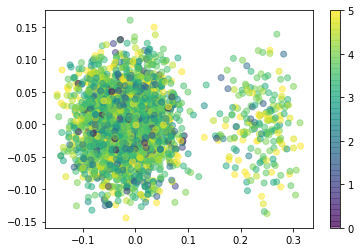

In [34]:
plt.scatter(data=principalDf,x='principal component 1',y='principal component 2',c=principalDf['Stars'],alpha=5/10)
plt.colorbar()

### the variety doesn't play major role in seperating the ratings

### let's check if this associated with countries contribution in rating over time.

In [35]:
TopRamenCountris = ramen_df['Country'].value_counts()[:11]
TopRamenCountris

Japan          352
USA            323
South Korea    307
Taiwan         224
Thailand       191
China          169
Malaysia       155
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [36]:
df = ramen_df.query('Country in @TopRamenCountris.index')
k = df.loc[:,['Country','Stars']].groupby([np.arange(len(df))//40,'Country']).mean()
k = k.reset_index()
k

,level_0,Country,Stars
0,0,China,4.000000
1,0,Hong Kong,4.333333
2,0,Indonesia,4.500000
3,0,Japan,3.281250
4,0,Malaysia,5.000000
...,...,...,...
492,54,Taiwan,1.500000
493,54,Thailand,2.000000
494,54,USA,2.666667
495,54,Vietnam,2.437500


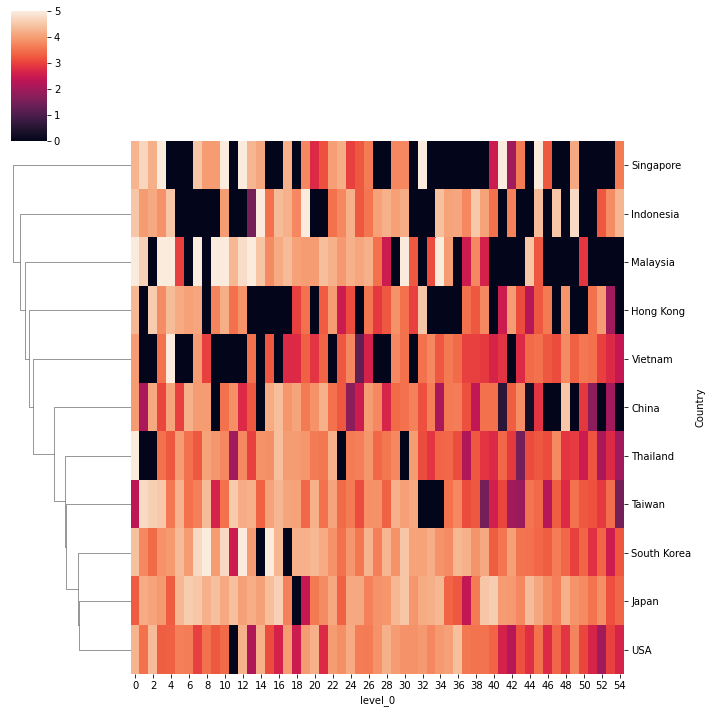

In [37]:

d = k.pivot("Country", "level_0", "Stars").fillna(0)
d = d.drop(55,axis=1)
sns.clustermap(d,col_cluster=False)

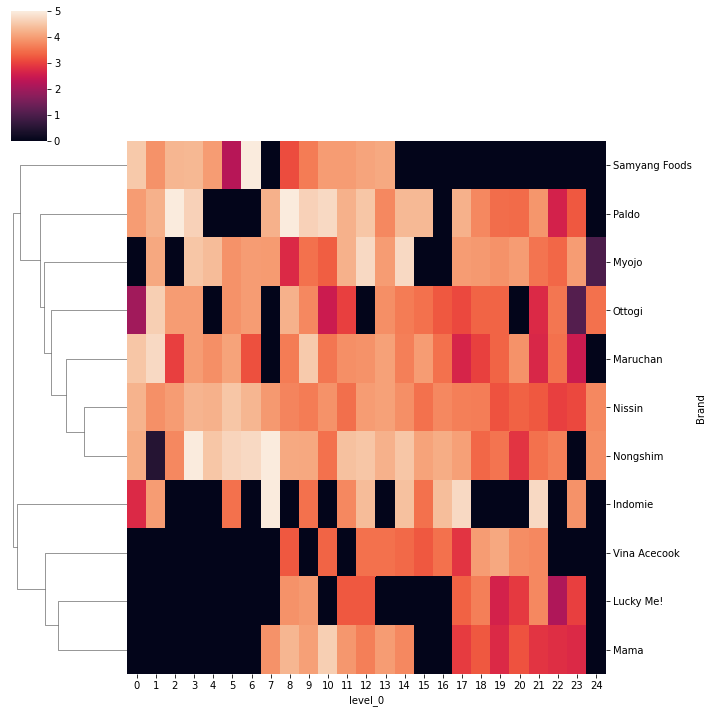

In [38]:
TopRamenBrands = ramen_df['Brand'].value_counts()[:11]
df = ramen_df.query('Brand in @TopRamenBrands.index')
k = df.loc[:,['Brand','Stars']].groupby([np.arange(len(df))//40,'Brand']).mean()
k = k.reset_index()
d = k.pivot("Brand", "level_0", "Stars").fillna(0)
#d = d.drop(55,axis=1)
sns.clustermap(d,col_cluster=False)

>Some brands doesn't have reviews in early times like Mama, Luckt Me!, Vina Acecook. 
Samyang Foods doesn't have records at late times. 

>Nissin has moderately high ratings over time.
Some Brands has no records in some time intervals and some has really high ratings at early times which decreases over time like Nongshim and Paldo.

In [39]:
TopRamenBrands = ramen_df['Brand'].value_counts()[:10]
df = ramen_df.query('Brand in @TopRamenBrands.index')
k = df.loc[:,['Brand','Stars']].groupby([np.arange(len(df))//40,'Brand']).mean()
k = k.reset_index()

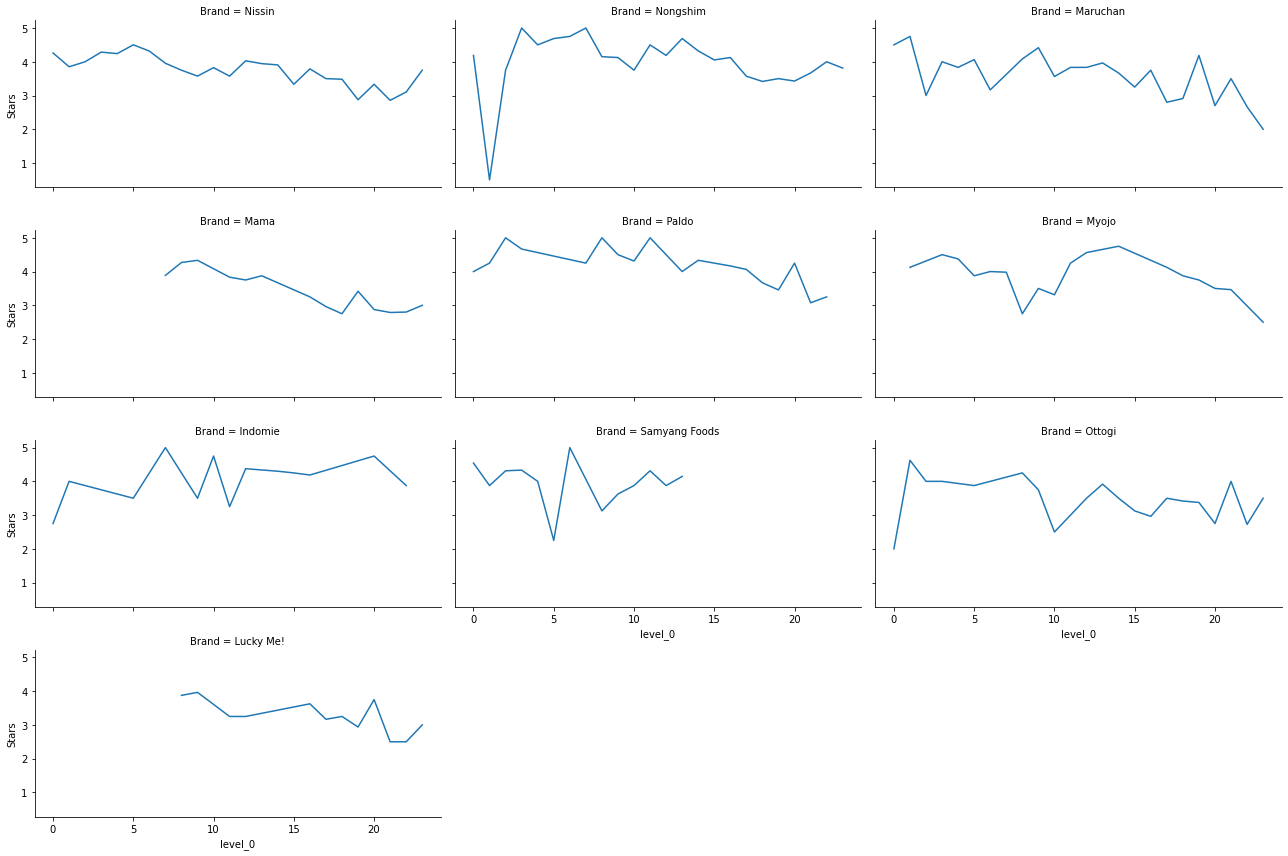

In [40]:
g= sns.FacetGrid(data=k,col='Brand',col_order=TopRamenBrands.index,aspect=2,col_wrap=3);

g.map(plt.plot,'level_0','Stars');

There are many flactuations but in general some Brands are increasing in ratings with time, some are decreasing and some just are maintaining their level.